In [1]:
pip install dmba

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 88.6 MB/s eta 0:00:00


In [31]:
import pandas as pd
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
import matplotlib.pylab as plt
import dmba
from dmba import classificationSummary

In [4]:
diabets_data = pd.read_csv("diabetes.csv")
diabets_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
#3- Split the data based on this rule: 65% into training and the rest into a test set!
y = diabets_data['Outcome']
X = diabets_data.drop(columns=['Outcome'])

In [6]:
#3- Split the data based on this rule: 65% into training and the rest into a test set!
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

In [7]:
X_train.head() # entire data not in 0, 1's so scale it

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
439,6,107,88,0,0,36.8,0.727,31
643,4,90,0,0,0,28.0,0.610,31
104,2,85,65,0,0,39.6,0.930,27
114,7,160,54,32,175,30.5,0.588,39
749,6,162,62,0,0,24.3,0.178,50


In [8]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the data
X_train_scaled = scaler.fit_transform(X_train) # fit_transform for training test
X_test_scaled = scaler.transform(X_test) # only .transform for test test

In [9]:
X_train_scaled = pd.DataFrame(X_train_scaled) # use .dataframe to be in data format

In [10]:
X_train_scaled.head()

,0,1,2,3,4,5,6,7
0,0.682946,-0.451583,0.996114,-1.330455,-0.687020,0.625074,0.744734,-0.185851
1,0.069463,-0.974200,-3.852723,-1.330455,-0.687020,-0.523004,0.403596,-0.185851
2,-0.544021,-1.127911,-0.271196,-1.330455,-0.687020,0.990372,1.336625,-0.527120
3,0.989687,1.177752,-0.877300,0.734142,0.830894,-0.196846,0.339450,0.496686
4,0.682946,1.239236,-0.436497,-1.330455,-0.687020,-1.005719,-0.855993,1.435176


In [11]:
X_test_scaled = pd.DataFrame(X_test_scaled)

In [12]:
# 4- Run the KNN model and report the optimal number of K! How is the performance of the model with that optimal K?
knn = KNeighborsClassifier(n_neighbors=3) # assume n_neighbors=3 is optimal k

In [13]:
# to fit under train our model
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [14]:
y_pred = knn.predict(X_test_scaled)

In [15]:
accuracy = accuracy_score(y_test, y_pred) # (actual y , predicted y)
print(f"Test Accuracy: {accuracy}")

Test Accuracy: 0.7100371747211895


In [ ]:
#Initialize a data frame with two columns: k and accuracy

In [21]:
# Train a classifier for different values of k
results = []
for k in range(1, 15):
    knn = KNeighborsClassifier(n_neighbors=k).fit(X_train_scaled, y_train)
    results.append({
        'k': k,
        'accuracy': accuracy_score(y_test, knn.predict(X_test_scaled))
    })

# Convert results to a pandas data frame
results = pd.DataFrame(results)
print(results)

# k=3 is optimal k value as the value is highe and after that the value is const

     k  accuracy
0    1  0.646840
1    2  0.676580
2    3  0.710037
3    4  0.698885
4    5  0.710037
5    6  0.706320
6    7  0.706320
7    8  0.691450
8    9  0.702602
9   10  0.702602
10  11  0.698885
11  12  0.713755
12  13  0.706320
13  14  0.710037


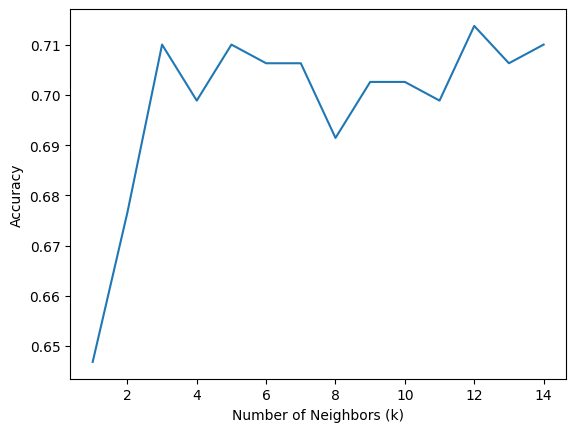

In [20]:
k_values = range(1, 15)
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k).fit(X_train_scaled, y_train)
    scores = accuracy_score(y_test, knn.predict(X_test_scaled))
    accuracy_scores.append(scores.mean())


plt.plot(k_values, accuracy_scores)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.show()
# this graph shows k=3 is optimal k value as the value is highe and after that the value is const

In [ ]:
# Naive Bayes

In [22]:
from sklearn.naive_bayes import MultinomialNB

In [23]:
# run naive Bayes
# new object by putting multinomial
delays_nb = MultinomialNB()
delays_nb.fit(X_train, y_train)

MultinomialNB()

In [25]:
# predict class membership
#predicted value of flight status based on idepo var in test test
y_valid_pred = delays_nb.predict(X_test)

In [26]:
accuracy = accuracy_score(y_test, y_valid_pred)
print(f"Test Accuracy after Discretization: {accuracy}")

Test Accuracy after Discretization: 0.5947955390334573


In [ ]:
# neural_network

In [27]:
from sklearn.neural_network import MLPClassifier

In [38]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Scale the data
X_train_scaled = scaler.fit_transform(X_train) # fit_transform for training test
X_test_scaled = scaler.transform(X_test) # only .transform for test test

In [39]:
X_train_scaled = pd.DataFrame(X_train_scaled)

In [40]:
X_train_scaled.head()

,0,1,2,3,4,5,6,7
0,0.352941,0.537688,0.721311,0.000000,0.000000,0.548435,0.277114,0.166667
1,0.235294,0.452261,0.000000,0.000000,0.000000,0.417288,0.227156,0.166667
2,0.117647,0.427136,0.532787,0.000000,0.000000,0.590164,0.363792,0.100000
3,0.411765,0.804020,0.442623,0.507937,0.206856,0.454545,0.217763,0.300000
4,0.352941,0.814070,0.508197,0.000000,0.000000,0.362146,0.042699,0.483333


In [41]:
X_test_scaled = pd.DataFrame(X_test_scaled)

In [42]:
classes = sorted(y.unique())

In [43]:
print(classes)

[0, 1]


In [44]:
# calcilate neuaral netwrok by defining below functions hidden_layer_sizes=[1], activation='logistic'
clf = MLPClassifier(hidden_layer_sizes=[1], activation='logistic',  random_state=1)
clf.fit(X, y)
clf.predict(X) # on test set

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


array([1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,

In [45]:
print(clf.intercepts_) # intercept value

[array([-0.31707215]), array([-0.66064813])]


In [46]:
print(clf.coefs_) # weights

[array([[ 1.41891747e-01],
       [ 2.82347462e-01],
       [-4.65454641e-01],
       [ 3.93237006e-04],
       [-5.31647036e-01],
       [-1.88554600e-01],
       [-2.73029403e-01],
       [ 6.23979903e-02]]), array([[0.68001568]])]


In [47]:
# Prediction
# use pandas concat for getting entire original data along with new predited data
print(pd.concat([diabets_data,pd.DataFrame(clf.predict_proba(X), columns=classes)], axis=1))

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome         0         1  
0                       0.627   50        1  

In [48]:
classificationSummary(y, clf.predict(X), class_names=classes)

Confusion Matrix (Accuracy 0.6719)

       Prediction
Actual   0   1
     0 460  40
     1 212  56


In [ ]:
# 6- Now run logistic regression, decision tree, and random Forest models and compare the performance of all 6 models you have run. Which model would you select as the best predictive model?

In [53]:
# logistic regression Accuaracy
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from dmba import classificationSummary
from dmba.metric import AIC_score
from sklearn import metrics

#decision tree Model Accuaracy
#random Forest Model Accuaracy

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)
logit_reg = LogisticRegression()
logit_reg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [57]:
logit_reg_pred = logit_reg.predict(X_test)
logit_reg_proba = logit_reg.predict_proba(X_test)
logit_result = pd.DataFrame({'actual': y_test,
                             'p(0)': [p[0] for p in logit_reg_proba],
                             'p(1)': [p[1] for p in logit_reg_proba],
                             'predicted': logit_reg_pred })

In [58]:
classificationSummary(y_train, logit_reg.predict(X_train))
classificationSummary(y_test, logit_reg.predict(X_test))

Confusion Matrix (Accuracy 0.7876)

       Prediction
Actual   0   1
     0 285  34
     1  72 108
Confusion Matrix (Accuracy 0.7435)

       Prediction
Actual   0   1
     0 147  34
     1  35  53


In [60]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier #if numerical use regresssor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import matplotlib.pylab as plt
import dmba
from dmba import plotDecisionTree, classificationSummary, regressionSummary
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [63]:
# Decision tressModel
fullClassTree = DecisionTreeClassifier()
fullClassTree.fit(X_train, y_train)

DecisionTreeClassifier()

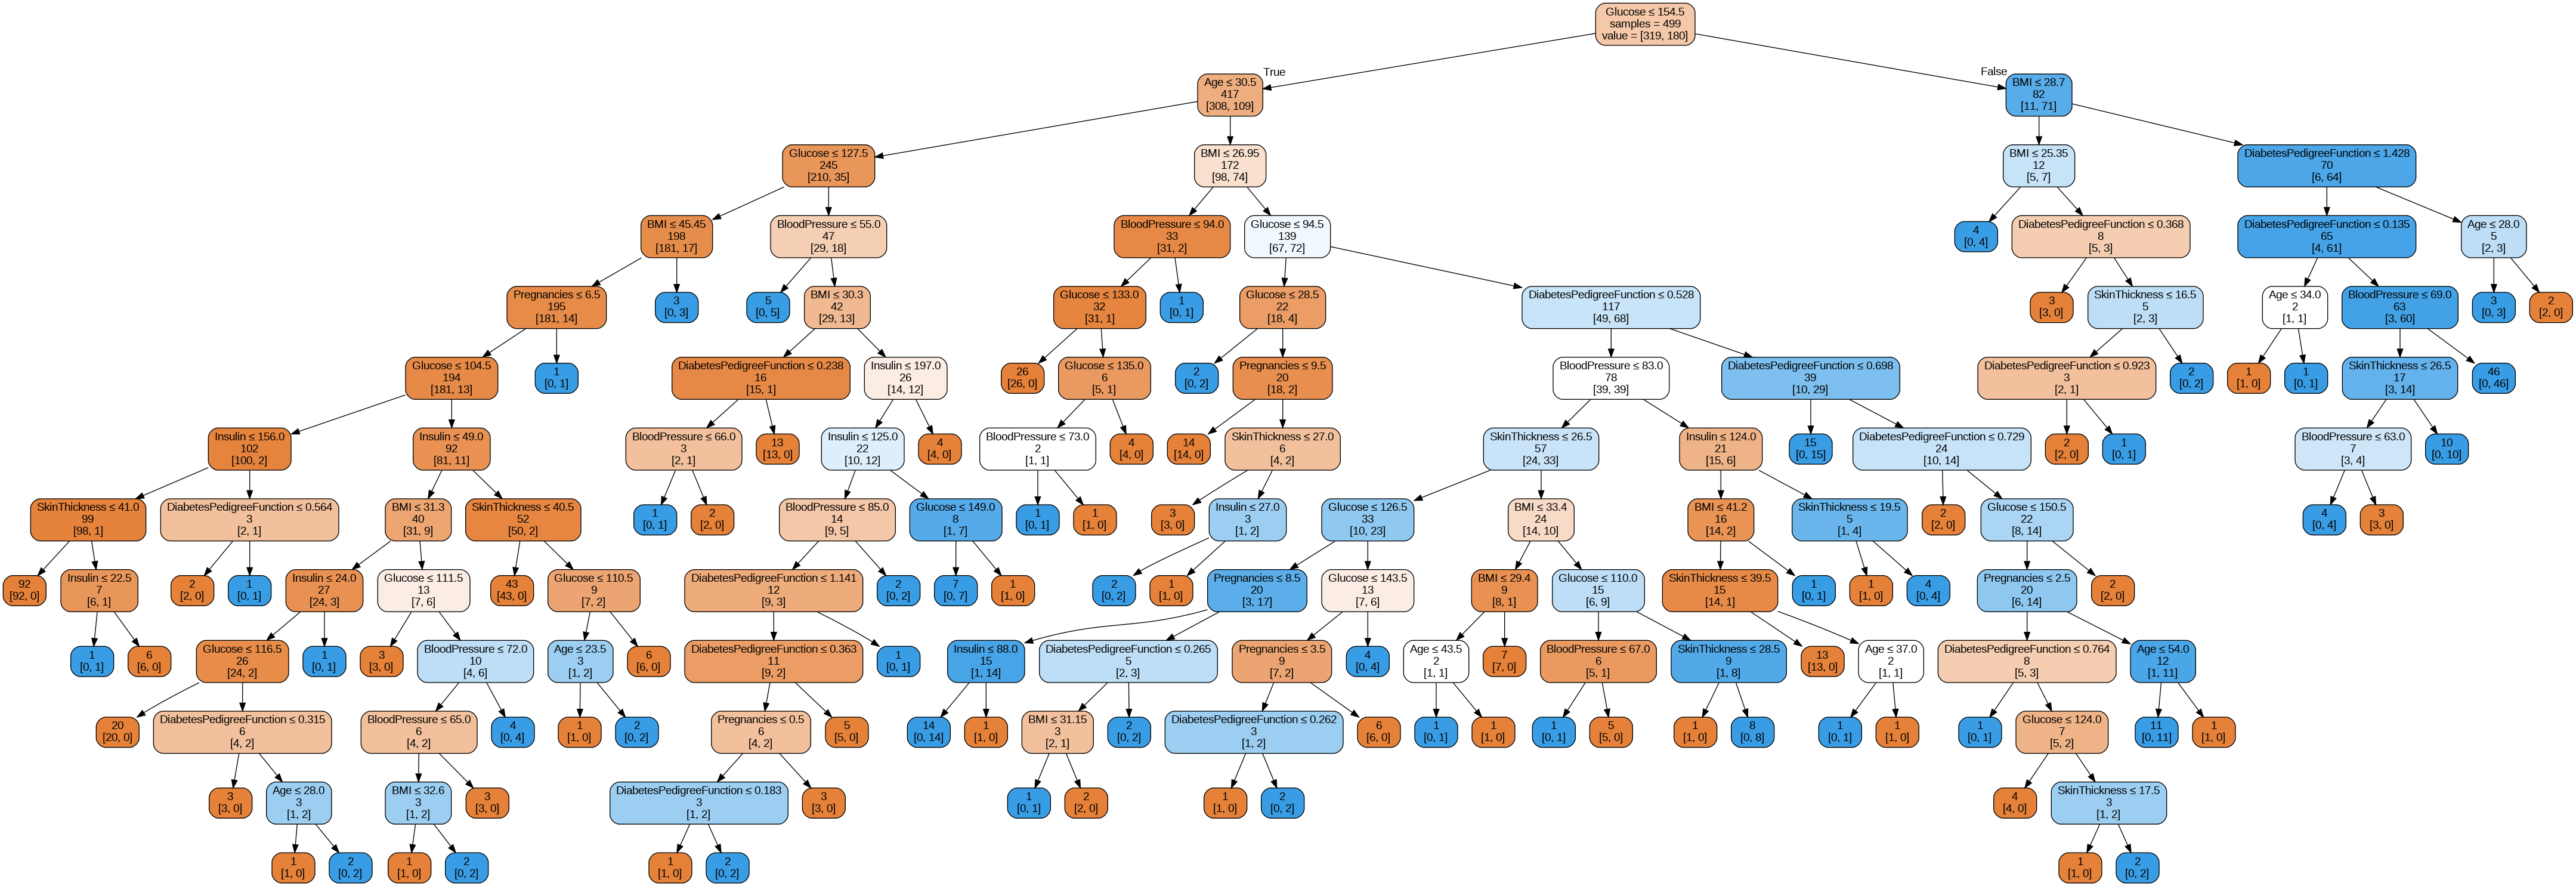

In [64]:
plotDecisionTree(fullClassTree, feature_names=X_train.columns) #

In [66]:
classificationSummary(y_train, fullClassTree.predict(X_train)) #confu matrix on trainign and test set, usually accuracy of test will be low because of size given
classificationSummary(y_test, fullClassTree.predict(X_test))

Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual   0   1
     0 319   0
     1   0 180
Confusion Matrix (Accuracy 0.7175)

       Prediction
Actual   0   1
     0 135  46
     1  30  58


In [67]:
# RandomForestClassifier

In [69]:
rf = RandomForestClassifier(n_estimators=500, random_state=42) # no of tress is n_estimators
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=42)

In [70]:
classificationSummary(y_test, rf.predict(X_test))

Confusion Matrix (Accuracy 0.7584)

       Prediction
Actual   0   1
     0 148  33
     1  32  56
